In [1]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, str(Path.cwd().resolve().parent))
from BeamPropagator1D import BeamPropagator1D
import HelperFuns as hf
import plotting
sys.path.remove(str(Path.cwd().resolve().parent))

Below we are trying to replicate the code involved in the original BP code. It is replicating a 4F system. The focal length is 5615, and the hologram region is a length of 7812.5 centered in the region. The wavelength is 1 um, and all physical units are in microns.

In [2]:
#Define propagators for optical regions.
bp_free = BeamPropagator1D(wavelen=1)
bp_hol = BeamPropagator1D(wavelen=1, index=2)
#Define x-dimension sampling for both propgagators.
bp_free.set_x_dimension(start = -2000, end = 2000, num_samples=4096)
bp_hol.set_x_dimension(start = -2000, end = 2000, num_samples=4096)
#Enable absorbing boundary conditions for both propagators.
bp_free.set_abs_bcs(width_factor=128)
bp_hol.set_abs_bcs(width_factor=128)
#Define optical elements in system. Physical units in microns.
lens = hf.lens_phase_transform(x = bp_free.get_x_dimension(), focal_len=5615, wavelen=1.0)
# Define initial beam. Physical units in microns.
E0 = hf.gaussian_amp(A=3, x = bp_free.get_x_dimension(), waist=2.5, mu=-450)
bp_free.set_init_Efield(E0)

## Test Constant Indices

In [3]:
#Make storage objects for propagated fields and z-values.
z_vals = []
all_fields = []

In [4]:
# Define z-dimension sampling and propagate.
bp_free.set_z_dimension(end=5615, num_samples=500)
E_proped = bp_free.propagate()
# Add results to storage.
z_vals.extend(bp_free.get_z_dimension())
all_fields.extend(bp_free.field_steps)

In [5]:
# Multiply by lens transform.
E1 = lens * E_proped
# Update z-dimension sampling.
bp_free.set_z_dimension(end=1708.75, num_samples=150)
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.get_z_dimension() + z_vals[-1])
all_fields.extend(bp_free.field_steps)

In [6]:
# Propagate through "hologram".
bp_hol.set_z_dimension(end=7812.5, num_samples=1000)
bp_hol.set_init_Efield(E_proped)
E_proped = bp_hol.propagate()
#Store results.
all_fields.extend(bp_hol.field_steps)
z_vals.extend(bp_hol.get_z_dimension() + z_vals[-1])

In [7]:
# Propagate through free space.
bp_free.set_z_dimension(end=1708.75, num_samples=150)
bp_free.set_init_Efield(E_proped)
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.get_z_dimension() + z_vals[-1])
all_fields.extend(bp_free.field_steps)

In [8]:
# Multiply by lens transform.
E1 = E_proped * lens
# Update propagation distance.
bp_free.set_z_dimension(end=5615, num_samples=500)
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.get_z_dimension() + z_vals[-1])
all_fields.extend(bp_free.field_steps)

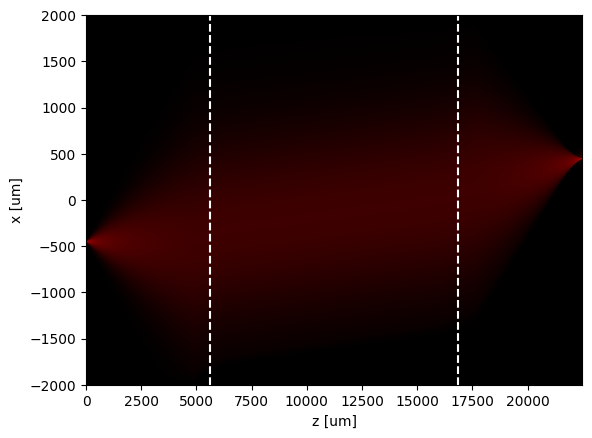

In [9]:
#Plotting time!
plotting.plot_fields(
    x = z_vals,
    y = bp_free.get_x_dimension(),
    z = [np.transpose(np.abs(all_fields)**(1/2))],
    max_colors=['#F00'],
)
plt.vlines([5615, 3*5615], -2000, 2000, colors='white',linestyles='dashed')
plt.ylabel("x [um]")
plt.xlabel("z [um]")
plt.show()

## Test Simple Hologram

In [10]:
#Make storage objects for propagated fields and z-values.
z_vals = []
all_fields = []
bp_free.set_init_Efield(E0)
# Define z-dimension sampling and propagate.
bp_free.set_z_dimension(end=5615, num_samples=500)
E_proped = bp_free.propagate()
# Add results to storage.
z_vals.extend(bp_free.get_z_dimension())
all_fields.extend(bp_free.field_steps)
# Multiply by lens transform.
E1 = lens * E_proped
# Update z-dimension sampling.
bp_free.set_z_dimension(end=1708.75, num_samples=150, z_offset=z_vals[-1])
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.get_z_dimension())
all_fields.extend(bp_free.field_steps)

In [11]:
bp_hol.set_z_dimension(end=7812.5, num_samples=1000, z_offset = z_vals[-1])
# Set the hologram modulation.
idx_mod = (1/60) * np.cos((2*np.pi/bp_hol.wl) * bp_hol.get_x_dimension())
bp_hol.set_1D_idx_pertubation(idx_mod)
# Propagate through "hologram".
bp_hol.set_init_Efield(E_proped)
E_proped = bp_hol.propagate()
#Store results.
all_fields.extend(bp_hol.field_steps)
z_vals.extend(bp_hol.get_z_dimension())

In [12]:
# Propagate through free space.
bp_free.set_z_dimension(end=1708.75, num_samples=150, z_offset=z_vals[-1])
bp_free.set_init_Efield(E_proped)
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.get_z_dimension())
all_fields.extend(bp_free.field_steps)
# Multiply by lens transform.
E1 = E_proped * lens
# Update propagation distance.
bp_free.set_z_dimension(end=5615, num_samples=500, z_offset=z_vals[-1])
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.get_z_dimension())
all_fields.extend(bp_free.field_steps)

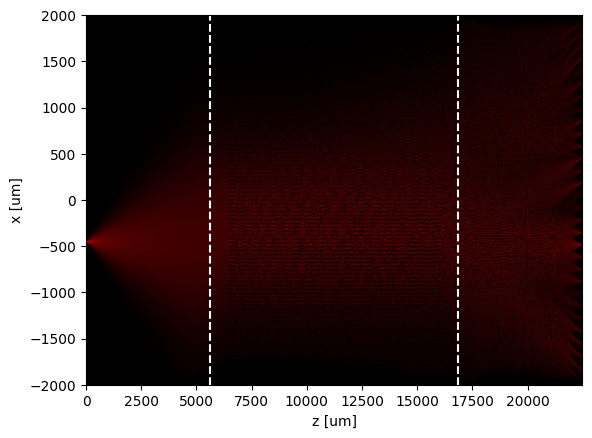

In [13]:
#Plotting time!
plotting.plot_fields(
    x = z_vals,
    y = bp_hol.get_x_dimension(),
    z = [np.transpose(np.abs(all_fields)**(1/2))],
    max_colors=['#F00'],
)
plt.vlines([5615, 3*5615], -2000, 2000, colors='white',linestyles='dashed')
plt.ylabel("x [um]")
plt.xlabel("z [um]")
plt.show()

## Test Full-Region Index Behavior

In [14]:
#Make storage objects for propagated fields and z-values.
z_vals = []
all_fields = []
bp_free.set_init_Efield(E0)
# Define z-dimension sampling and propagate.
bp_free.set_z_dimension(end=5615, num_samples=500)
E_proped = bp_free.propagate()
# Add results to storage.
z_vals.extend(bp_free.get_z_dimension())
all_fields.extend(bp_free.field_steps)
# Multiply by lens transform.
E1 = lens * E_proped
# Update z-dimension sampling.
bp_free.set_z_dimension(end=1708.75, num_samples=150, z_offset=z_vals[-1])
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.get_z_dimension())
all_fields.extend(bp_free.field_steps)

In [15]:
bp_hol.set_z_dimension(end=7812.5, num_samples=1000, z_offset = z_vals[-1])
# Set the hologram modulation.
idx_mod = (1/60) * np.cos((2*np.pi/bp_hol.wl) * bp_hol.get_x_dimension())
bp_hol.set_index_perturbation(np.array([idx_mod] * len(bp_hol.get_z_dimension())))
# Propagate through "hologram".
bp_hol.set_init_Efield(E_proped)
E_proped = bp_hol.propagate()
#Store results.
all_fields.extend(bp_hol.field_steps)
z_vals.extend(bp_hol.get_z_dimension())

In [16]:
# Propagate through free space.
bp_free.set_z_dimension(end=1708.75, num_samples=150, z_offset=z_vals[-1])
bp_free.set_init_Efield(E_proped)
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.get_z_dimension())
all_fields.extend(bp_free.field_steps)
# Multiply by lens transform.
E1 = E_proped * lens
# Update propagation distance.
bp_free.set_z_dimension(end=5615, num_samples=500, z_offset=z_vals[-1])
# Update initial field.
bp_free.set_init_Efield(E1)
# Propagate.
E_proped = bp_free.propagate()
# Store results.
z_vals.extend(bp_free.get_z_dimension())
all_fields.extend(bp_free.field_steps)

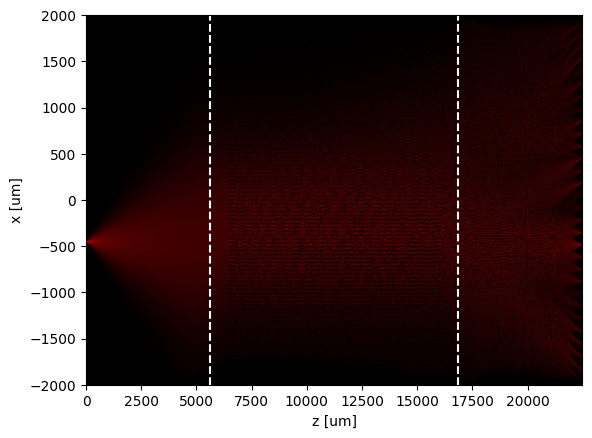

In [17]:
#Plotting time!
plotting.plot_fields(
    x = z_vals,
    y = bp_hol.get_x_dimension(),
    z = [np.transpose(np.abs(all_fields)**(1/2))],
    max_colors=['#F00'],
)
plt.vlines([5615, 3*5615], -2000, 2000, colors='white',linestyles='dashed')
plt.ylabel("x [um]")
plt.xlabel("z [um]")
plt.show()

## Test Intensity Index Updating

In [18]:
def prop_full_region(init, prop_free, prop_hol, all = False):
    z_vals = []
    all_fields = []
    prop_free.set_init_Efield(init)
    # Define z-dimension sampling and propagate.
    prop_free.set_z_dimension(end=5615, num_samples=500)
    E_proped = prop_free.propagate()
    # Add results to storage.
    z_vals.extend(prop_free.get_z_dimension())
    all_fields.extend(prop_free.field_steps)
    # Multiply by lens transform.
    E1 = lens * E_proped
    # Update z-dimension sampling.
    prop_free.set_z_dimension(end=1708.75, num_samples=150, z_offset=z_vals[-1])
    # Update initial field.
    prop_free.set_init_Efield(E1)
    # Propagate.
    E_proped = prop_free.propagate()
    # Store results.
    z_vals.extend(prop_free.get_z_dimension())
    all_fields.extend(prop_free.field_steps)

    # Propagate through the hologram.
    prop_hol.set_z_dimension(end=7812.5, num_samples=1000, z_offset=z_vals[-1])
    # Propagate through "hologram".
    prop_hol.set_init_Efield(E_proped)
    E_proped = prop_hol.propagate()
    #Store results.
    all_fields.extend(prop_hol.field_steps)
    z_vals.extend(prop_hol.get_z_dimension())

    #Store hologram fields.
    hol_field = prop_hol.field_steps

    # Propagate through free space.
    prop_free.set_z_dimension(end=1708.75, num_samples=150, z_offset=z_vals[-1])
    prop_free.set_init_Efield(E_proped)
    E_proped = prop_free.propagate()
    # Store results.
    z_vals.extend(prop_free.get_z_dimension())
    all_fields.extend(prop_free.field_steps)
    # Multiply by lens transform.
    E1 = E_proped * lens
    # Update propagation distance.
    prop_free.set_z_dimension(end=5615, num_samples=500, z_offset=z_vals[-1])
    # Update initial field.
    prop_free.set_init_Efield(E1)
    # Propagate.
    E_proped = prop_free.propagate()
    # Store results.
    z_vals.extend(prop_free.get_z_dimension())
    all_fields.extend(prop_free.field_steps)

    if all:
        return hol_field, all_fields, z_vals
    else:
        return hol_field, E_proped


In [19]:
bp_hol.remove_index_perturbation()
h_field, new_E = prop_full_region(E0, bp_free, bp_hol, False)
# Update index perturbation. Base index stays the same.
new_idx = hf.delta_idx_intensity(np.abs(h_field)**2, int_coeff=0.08)
bp_hol.set_index_perturbation(new_idx)
# Re-propagate.
# Keep going.
for i in range(4):
    fields, new_E = prop_full_region(E0, bp_free, bp_hol, False)
    new_idx = hf.delta_idx_intensity(np.abs(h_field)**2, int_coeff=0.08)
    bp_hol.set_index_perturbation(new_idx)
_, fields, z_vals = prop_full_region(E0, bp_free, bp_hol, True)
# Unmask global variable _.
del _

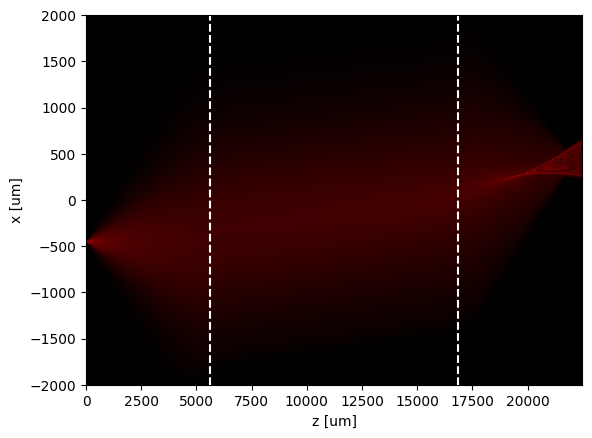

In [20]:
# Plot result.
plotting.plot_fields(
    x = z_vals,
    y = bp_hol.get_x_dimension(),
    z = [np.transpose(np.abs(fields)**(1/2))],
    max_colors=['#F00'],
)
plt.vlines([5615, 3*5615], -2000, 2000, colors='white',linestyles='dashed')
plt.ylabel("x [um]")
plt.xlabel("z [um]")
plt.show()